In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family'] = ['Arial Unicode MS']  

In [104]:
ords = pd.read_csv('data/cb7dcb64e554e04f617275e422935500_be7a5fbd7e37e48cacdadd6d46d432ba_8.csv')

In [105]:
ords.shape, ords.columns

((9959, 25),
 Index(['发货前天数（实际）', '发货前天数（计划）', '每笔订单利润', '销售额预测', '每名客户销售额', '装运状态', '记录数',
        '利润率', '产品名称', '利润', '发货日期', '国家', '地区', '城市', '子类别', '客户名称', '折扣',
        '数量', '省/自治区', '类别', '细分', '订单 ID', '订单日期', '邮寄方式', '销售额'],
       dtype='object'))

In [106]:
ords.head()

,发货前天数（实际）,发货前天数（计划）,每笔订单利润,销售额预测,每名客户销售额,装运状态,记录数,利润率,产品名称,利润,...,客户名称,折扣,数量,省/自治区,类别,细分,订单 ID,订单日期,邮寄方式,销售额
0,2,￥3,(￥61),￥170,￥130,提前装运,1,-47%,"Fiskars 剪刀, 蓝色",(￥61),...,曾惠,40%,2,浙江,办公用品,公司,US-2018-1357144,2018/4/27,二级,￥130
1,4,￥6,￥43,￥164,￥125,提前装运,1,34%,"GlobeWeis 搭扣信封, 红色",￥43,...,许安,0%,2,四川,办公用品,消费者,CN-2018-1973789,2018/6/15,标准级,￥125
2,4,￥6,￥4,￥42,￥32,提前装运,1,13%,"Cardinal 孔加固材料, 回收",￥4,...,许安,40%,2,四川,办公用品,消费者,CN-2018-1973789,2018/6/15,标准级,￥32
3,4,￥6,(￥27),￥421,￥321,提前装运,1,-8%,"Kleencut 开信刀, 工业",(￥27),...,宋良,40%,4,江苏,办公用品,公司,US-2018-3017568,2018/12/9,标准级,￥321
4,2,￥3,￥550,"￥1,803","￥1,376",提前装运,1,40%,"KitchenAid 搅拌机, 黑色",￥550,...,万兰,0%,3,广东,办公用品,消费者,CN-2017-2975416,2017/5/31,二级,"￥1,376"


In [107]:
def remove_par_and_unit_from_int_str(s: str):
    s = s.replace(',', '')
    if s[0] == '(':
        return -int(s[2:-1])
    else:
        return int(s[1:])


In [108]:
cols = ['发货前天数（计划）', '每笔订单利润', '销售额预测', '每名客户销售额','利润', '销售额']
for col in cols:
    ords[col] = ords[col].apply(remove_par_and_unit_from_int_str)

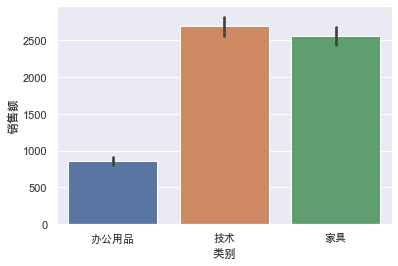

In [109]:
sns.barplot(x='类别', y='销售额', data=ords, estimator=np.mean);

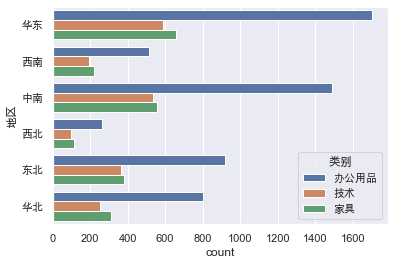

In [110]:
sns.countplot(y='地区',hue='类别', data=ords);

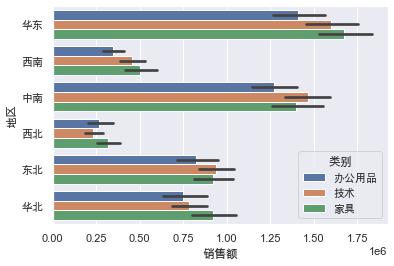

In [111]:
sns.barplot(x='销售额', y='地区',hue='类别', data=ords, estimator=np.sum);

In [112]:
hd_ords = ords[ords['地区']=='华东']
top4_cities = hd_ords.groupby('城市')['销售额'].sum().sort_values(ascending=False)[:4].index
top4_cities

Index(['上海', '青岛', '厦门', '宿州'], dtype='object', name='城市')

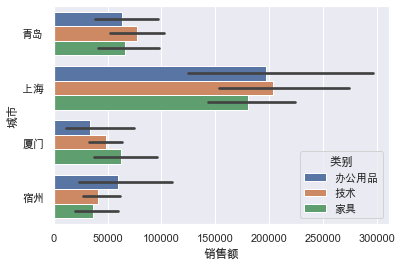

In [113]:
sns.barplot(x='销售额', y='城市',hue='类别', data=hd_ords[hd_ords['城市'].isin(list(top4_cities))], estimator=sum);

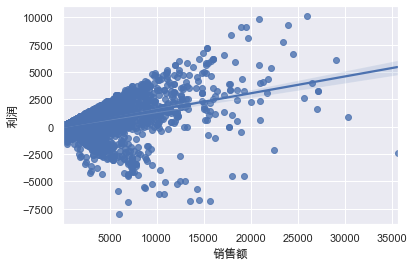

In [114]:
sns.regplot(x='销售额', y='利润', data=ords);

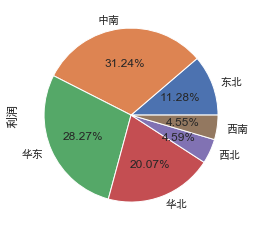

In [115]:
ords.groupby('地区')['利润'].sum().plot.pie(autopct='%1.2f%%');

In [179]:
clazz = ords.groupby(['类别', '子类别']).sum()
clazz.index = clazz.index.to_flat_index()


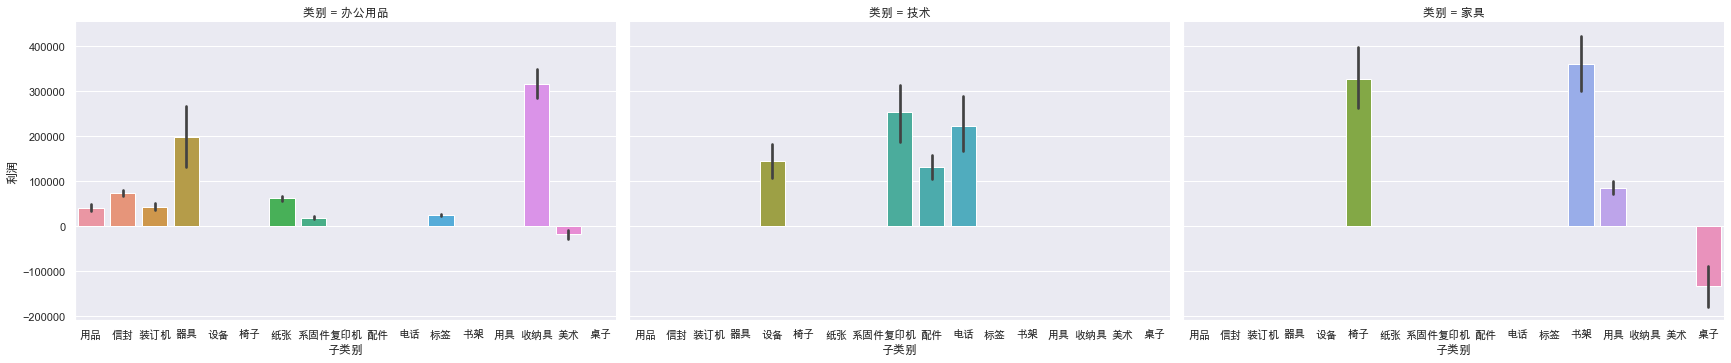

In [184]:
sns.catplot(x="子类别", y="利润",
            col="类别", aspect=1.6,
            kind="bar", estimator=np.sum, data=ords);

In [128]:
total_by_date = ords.groupby('订单日期').sum()
total_by_date.index = pd.DatetimeIndex(total_by_date.index)


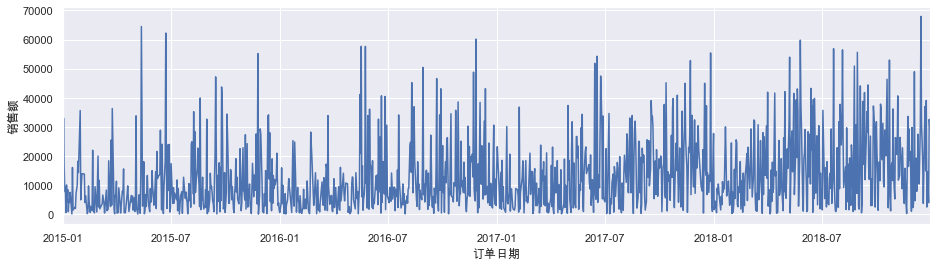

In [151]:
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
# maxsize = max([t.get_window_extent().width for t in tl])
maxsize = 30
m = 0.2  # inch margin
s = maxsize / plt.gcf().dpi * 30 + 2 * m
margin = m / plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1. - margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
sns.lineplot(data=total_by_date, x='订单日期', y='销售额');
